# Near Earth Objects (NEO) Project

## Story Idea

The project is inspired by a movie: Don't Look Up.

The idea is to look into all the **near-earth-objects (NEO)** observed by NASA from  1990 to 2021. The dataset can be found [here](https://www.kaggle.com/ramjasmaurya/near-earth-objects-observed-by-nasa/discussion). The documentation of this dataset is [here](https://cneos.jpl.nasa.gov/ca/).

Also, I find another [SBDB Close-Approach Data API](https://ssd-api.jpl.nasa.gov/doc/cad.html), where I can request small body within certain distance observed in certain time frame.

The angles that I can explore with:

- The distribution of the diameter (focus on the 5% top largest NEOs)
- The closest NEOs in history: case study
- An interactive narrative (x: year; y: distance; size: diameter)

## Basic Analysis

### Step1: Read the file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("near-earth-objects.csv")
df.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter
0,509352 (2007 AG),1900-Jan-04 22:25 ± 00:02,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m
1,(2014 SC324),1900-Jan-11 01:07 ± 00:18,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m
2,(2012 UK171),1900-Jan-12 23:07 ± 00:13,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.4,34 m - 77 m
3,4660 Nereus (1982 DB),1900-Jan-29 18:13 ± 00:24,8.09 | 0.02080,8.08 | 0.02077,5.54,5.52,18.4,0.33±0.05 km
4,(2015 RW83),1900-Feb-04 03:50 ± 14:49,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m


### Step 2: Clean the data

In [3]:
df[['time','uncertainty']] = df["Close-Approach (CA) Date"].str.split("±", expand=True)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df[['nominal_distance_LD','nominal_distance_AU']] = df["CA Distance Nominal (LD | au)"].str.split("|", expand=True)
df[['min_distance_LD','min_distance_AU']] = df["CA Distance Minimum (LD | au)"].str.split("|", expand=True)
df['nominal_distance_LD'] = df['nominal_distance_LD'].astype(float)
df['nominal_distance_AU'] = df['nominal_distance_AU'].astype(float)
df['min_distance_LD'] = pd.to_numeric(df['min_distance_LD'], errors='coerce')
df['min_distance_AU'] = df['min_distance_AU'].astype(float)

In [4]:
df[['min_diameter','max_diameter']] = df["Diameter"].str.split("-", expand=True)
df.min_diameter = df.min_diameter.str.replace("±[\d\.]*", "", regex=True).str.replace("m", "", regex=True)
df['min_measurement'] = df.min_diameter.str.extract("^([\d\.]*)").astype(float)
df['min_unit'] = df.min_diameter.str.split(" ").str[-1]
df.loc[df.min_unit == "k", 'min_measurement'] = df.min_measurement * 1000
df.max_diameter = df.max_diameter.str.replace("±[\d\.]*", "", regex=True).str.replace("m", "", regex=True)
df.max_diameter = df.max_diameter.fillna(df['min_measurement']).astype(str)
df["max_diameter"] = np.where(df.max_diameter.astype(str).str.contains("k"), 1000, 1) * df.max_diameter.str.replace("\\s*k$", "", regex=True).astype(float) 
df["avg_diameter"] = (df.max_diameter + df.min_measurement) / 2

Some dead code here. Don't know why I can't apply the same method to deal with max_diameter as min_diameter.

In [ ]:
#df.max_diameter = df.max_diameter.str.replace("±[\d\.]*", "", regex=True).str.replace("m", "", regex=True)
#df.max_diameter = df.max_diameter.fillna(df['min_measurement']).astype(str)
#df['max_measurement'] = df.max_diameter.astype(str).str.extract("^([\d\.]*)").astype(float)
#df['max_unit'] = df.max_diameter.astype(str).str.split(" ").str[-1]

In [5]:
df.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,time,uncertainty,nominal_distance_LD,nominal_distance_AU,min_distance_LD,min_distance_AU,min_diameter,max_diameter,min_measurement,min_unit,avg_diameter
0,509352 (2007 AG),1900-Jan-04 22:25 ± 00:02,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m,1900-01-04 22:25:00,00:02,3.75,0.00963,3.75,0.00962,250,570.0,250.0,,410.0
1,(2014 SC324),1900-Jan-11 01:07 ± 00:18,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m,1900-01-11 01:07:00,00:18,15.55,0.03997,15.53,0.03991,37,82.0,37.0,,59.5
2,(2012 UK171),1900-Jan-12 23:07 ± 00:13,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.4,34 m - 77 m,1900-01-12 23:07:00,00:13,19.39,0.04982,19.26,0.04950,34,77.0,34.0,,55.5
3,4660 Nereus (1982 DB),1900-Jan-29 18:13 ± 00:24,8.09 | 0.02080,8.08 | 0.02077,5.54,5.52,18.4,0.33±0.05 km,1900-01-29 18:13:00,00:24,8.09,0.02080,8.08,0.02077,0.33 k,330.0,330.0,k,330.0
4,(2015 RW83),1900-Feb-04 03:50 ± 14:49,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m,1900-02-04 03:50:00,14:49,12.89,0.03312,12.68,0.03258,40,90.0,40.0,,65.0


In [6]:
df.dtypes

Object                                   object
Close-Approach (CA) Date                 object
CA Distance Nominal (LD | au)            object
CA Distance Minimum (LD | au)            object
V relative (km/s)                       float64
V infinity (km/s)                       float64
H (mag)                                 float64
Diameter                                 object
time                             datetime64[ns]
uncertainty                              object
nominal_distance_LD                     float64
nominal_distance_AU                     float64
min_distance_LD                         float64
min_distance_AU                         float64
min_diameter                             object
max_diameter                            float64
min_measurement                         float64
min_unit                                 object
avg_diameter                            float64
dtype: object

In [7]:
df.shape

(31202, 14)

### Step 3: Analyze the closest date

#### An interesting finding here is that there is a huge spike in recent years, especially in fall. Plan to dig deeper into the reasons.

In [126]:
df.resample('M', on='time').size().sort_values(ascending=False)

time
2021-11-30    219
2021-10-31    185
2020-10-31    185
2019-10-31    181
2021-09-30    167
             ... 
2164-04-30      0
2164-06-30      0
2165-01-31      0
2198-01-31      0
2175-07-31      0
Length: 3611, dtype: int64

<AxesSubplot:xlabel='time'>

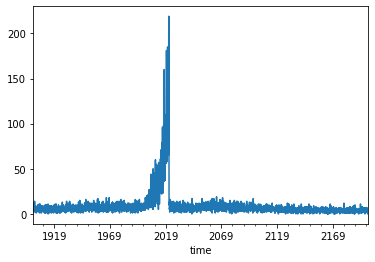

In [10]:
df.resample('M', on='time').size().plot()

### Step 4: Analyze the distance to earth

In [11]:
df.nominal_distance_LD.describe()

count    31202.000000
mean        10.931695
std          5.377403
min          0.020000
25%          6.610000
50%         11.400000
75%         15.557500
max         19.460000
Name: nominal_distance_LD, dtype: float64

<AxesSubplot:ylabel='Frequency'>

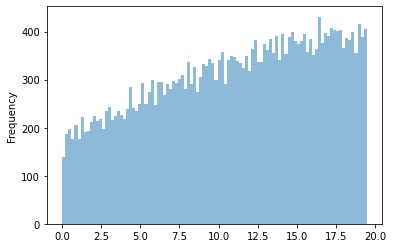

In [12]:
df.nominal_distance_LD.plot.hist(bins=100,alpha=0.5)

#### It's more reasonable to focus on the really, really close objects. So I filter out all smaller than one LD, which means the objects can be closer to the moon.

<AxesSubplot:ylabel='Frequency'>

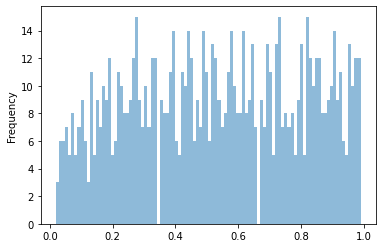

In [13]:
df[df.nominal_distance_LD < 1].nominal_distance_LD.plot.hist(bins=100,alpha=0.5)

In [14]:
df[df.nominal_distance_LD < 1].resample('M', on='time').size().sort_values(ascending=False)

time
2021-10-31    22
2021-04-30    19
2021-09-30    18
2021-11-30    16
2018-11-30    15
              ..
1917-09-30     0
1917-08-31     0
1917-07-31     0
1917-06-30     0
2062-02-28     0
Length: 3355, dtype: int64

<AxesSubplot:xlabel='time'>

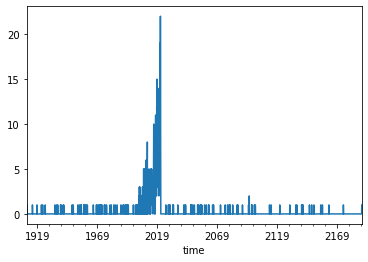

In [15]:
df[df.nominal_distance_LD < 1].resample('M', on='time').size().plot()

#### There are three objects flying to less than 0.02 LD, but all of which are quite small.

In [16]:
df[df.nominal_distance_LD == 0.02]

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,time,uncertainty,nominal_distance_LD,nominal_distance_AU,min_distance_LD,min_distance_AU
17100,(2020 QG),2020-Aug-16 04:09 ± < 00:01,0.02 | 6.23e-5,0.02 | 6.22e-5,12.33,8.15,29.9,2.8 m - 6.2 m,2020-08-16 04:09:00,< 00:01,0.02,0.000062,0.02,0.000062
17540,(2020 VT4),2020-Nov-13 17:21 ± < 00:01,0.02 | 4.51e-5,0.02 | 4.50e-5,13.43,7.88,28.7,4.8 m - 11 m,2020-11-13 17:21:00,< 00:01,0.02,0.000045,0.02,0.000045
18960,(2021 UA1),2021-Oct-25 03:07 ± < 00:01,0.02 | 6.30e-5,0.02 | 6.29e-5,15.84,12.89,31.8,1.1 m - 2.5 m,2021-10-25 03:07:00,< 00:01,0.02,0.000063,0.02,0.000063


### Step 5: Analyze the diameters

<AxesSubplot:ylabel='Frequency'>

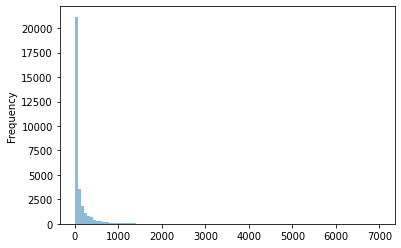

In [132]:
df.avg_diameter.plot.hist(bins = 100, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

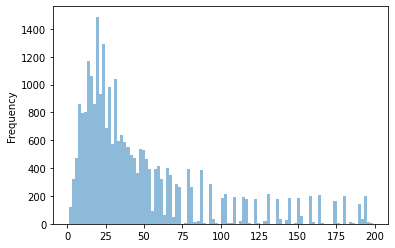

In [141]:
df[df.avg_diameter <200].avg_diameter.plot.hist(bins = 100, alpha=0.5)

In [134]:
df.avg_diameter.sort_values(ascending=False)

6917     7000.0
1997     6250.0
30746    6250.0
25513    6250.0
11017    5400.0
          ...  
8284        NaN
12783       NaN
12786       NaN
22663       NaN
26646       NaN
Name: avg_diameter, Length: 31202, dtype: float64

In [136]:
df[df.avg_diameter == 7000]

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,time,uncertainty,nominal_distance_LD,nominal_distance_AU,min_distance_LD,min_distance_AU,min_diameter,max_diameter,min_measurement,min_unit,avg_diameter
6917,53319 (1999 JM8),1990-Aug-08 09:55 ± < 00:01,13.03 | 0.03348,13.03 | 0.03348,12.69,12.68,15.3,7.±1.4 km,1990-08-08 09:55:00,< 00:01,13.03,0.03348,13.03,0.03348,7. k,7000.0,7000.0,k,7000.0


In [137]:
df[df.avg_diameter == 6250]

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,time,uncertainty,nominal_distance_LD,nominal_distance_AU,min_distance_LD,min_distance_AU,min_diameter,max_diameter,min_measurement,min_unit,avg_diameter
1997,3200 Phaethon (1983 TB),1931-Dec-13 12:01 ± < 00:01,14.95 | 0.03840,14.94 | 0.03840,34.60,34.60,14.3,6.25±0.15 km,1931-12-13 12:01:00,< 00:01,14.95,0.03840,14.94,0.03840,6.25 k,6250.0,6250.0,k,6250.0
25513,3200 Phaethon (1983 TB),2093-Dec-14 10:52 ± < 00:01,7.71 | 0.01982,7.71 | 0.01982,34.23,34.23,14.3,6.25±0.15 km,2093-12-14 10:52:00,< 00:01,7.71,0.01982,7.71,0.01982,6.25 k,6250.0,6250.0,k,6250.0
30746,3200 Phaethon (1983 TB),2189-Dec-15 05:49 ± < 00:01,13.81 | 0.03548,13.81 | 0.03548,34.79,34.79,14.3,6.25±0.15 km,2189-12-15 05:49:00,< 00:01,13.81,0.03548,13.81,0.03548,6.25 k,6250.0,6250.0,k,6250.0


In [149]:
df[(df.avg_diameter > 500) & (df.min_distance_LD < 1)]

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,time,uncertainty,nominal_distance_LD,nominal_distance_AU,min_distance_LD,min_distance_AU,min_diameter,max_diameter,min_measurement,min_unit,avg_diameter
906,152680 (1998 KJ9),1914-Dec-31 12:01 ± < 00:01,0.61 | 0.00156,0.60 | 0.00155,21.10,21.02,19.4,350 m - 780 m,1914-12-31 12:01:00,< 00:01,0.61,0.00156,0.60,0.00155,350,780.0,350.0,,565.0
1113,458732 (2011 MD5),1918-Sep-17 22:24 ± 00:04,0.91 | 0.00234,0.91 | 0.00234,12.99,12.90,18.0,670 m - 1.5 km,1918-09-17 22:24:00,00:04,0.91,0.00234,0.91,0.00234,670,1500.0,670.0,,1085.0
19975,153814 (2001 WN5),2028-Jun-26 05:23 ± < 00:01,0.65 | 0.00166,0.65 | 0.00166,10.24,10.08,18.3,0.932±0.011 km,2028-06-26 05:23:00,< 00:01,0.65,0.00166,0.65,0.00166,0.932 k,932.0,932.0,k,932.0
28501,153201 (2000 WO107),2140-Dec-01 19:50 ± < 00:01,0.63 | 0.00163,0.63 | 0.00162,26.02,25.96,19.3,0.510±0.083 km,2140-12-01 19:50:00,< 00:01,0.63,0.00163,0.63,0.00162,0.510 k,510.0,510.0,k,510.0
29743,497117 (2004 FU4),2166-Oct-24 21:57 ± 2_00:12,10.64 | 0.02735,0.41 | 0.00106,14.01,14.01,18.2,600 m - 1.3 km,2166-10-24 21:57:00,2_00:12,10.64,0.02735,0.41,0.00106,600,1300.0,600.0,,950.0


<AxesSubplot:xlabel='time'>

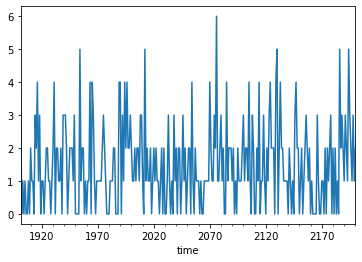

In [142]:
df[df.avg_diameter > 1000].resample('Y', on='time').size().plot()

### Step 6: Visualization

In [7]:
df.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,time,uncertainty,nominal_distance_LD,nominal_distance_AU,min_distance_LD,min_distance_AU,min_diameter,max_diameter,min_measurement,min_unit,avg_diameter
0,509352 (2007 AG),1900-Jan-04 22:25 ± 00:02,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m,1900-01-04 22:25:00,00:02,3.75,0.00963,3.75,0.00962,250,570.0,250.0,,410.0
1,(2014 SC324),1900-Jan-11 01:07 ± 00:18,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m,1900-01-11 01:07:00,00:18,15.55,0.03997,15.53,0.03991,37,82.0,37.0,,59.5
2,(2012 UK171),1900-Jan-12 23:07 ± 00:13,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.4,34 m - 77 m,1900-01-12 23:07:00,00:13,19.39,0.04982,19.26,0.04950,34,77.0,34.0,,55.5
3,4660 Nereus (1982 DB),1900-Jan-29 18:13 ± 00:24,8.09 | 0.02080,8.08 | 0.02077,5.54,5.52,18.4,0.33±0.05 km,1900-01-29 18:13:00,00:24,8.09,0.02080,8.08,0.02077,0.33 k,330.0,330.0,k,330.0
4,(2015 RW83),1900-Feb-04 03:50 ± 14:49,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m,1900-02-04 03:50:00,14:49,12.89,0.03312,12.68,0.03258,40,90.0,40.0,,65.0


In [11]:
df_final = df[['Object', 'time','min_distance_LD','min_measurement','max_diameter','avg_diameter']]

In [13]:
df_final.to_csv("final.csv",index = False)

In [9]:
from plotnine import *

In [19]:
filtered = df_final[df_final.avg_diameter > 100]
filtered.to_csv("filter.csv",index = False)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


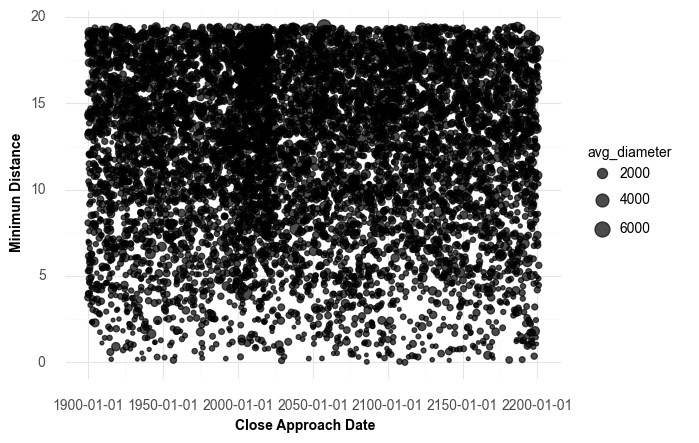

<ggplot: (311399870)>

In [18]:
p = (ggplot(filtered, aes(x='time', y='min_distance_LD'))          
        + geom_point(aes(size='avg_diameter'),alpha = 0.7)
        + labs(
            x = "Close Approach Date",
            y = "Minimun Distance",
        )
        + scale_color_manual(values=("#6B543F","#CDB09C"))
        + theme_minimal()
        + theme(
            text = element_text(family='Arial',size=10),
            axis_title = element_text(face='bold'),
            axis_text = element_text(size=10),
            plot_title = element_text(face='bold', size=13, ha='left', x=0.125, y=0.95),
        )

)   
display(p)